In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sympy as sp
import pyPI as pi

c:\Users\sbasa\Documents\GitHub\Polarimetric_Interferomerty\pyPI.py:50: RuntimeWarning: divide by zero encountered in divide
  vartheta = np.arctan(numerator/denominator)[0]
c:\Users\sbasa\Documents\GitHub\Polarimetric_Interferomerty\pyPI.py:59: RuntimeWarning: invalid value encountered in divide
  I_norm = ((I - I.min()) / (I.max() - I.min()) * 255).astype(np.uint8)
c:\Users\sbasa\Documents\GitHub\Polarimetric_Interferomerty\pyPI.py:59: RuntimeWarning: invalid value encountered in cast
  I_norm = ((I - I.min()) / (I.max() - I.min()) * 255).astype(np.uint8)


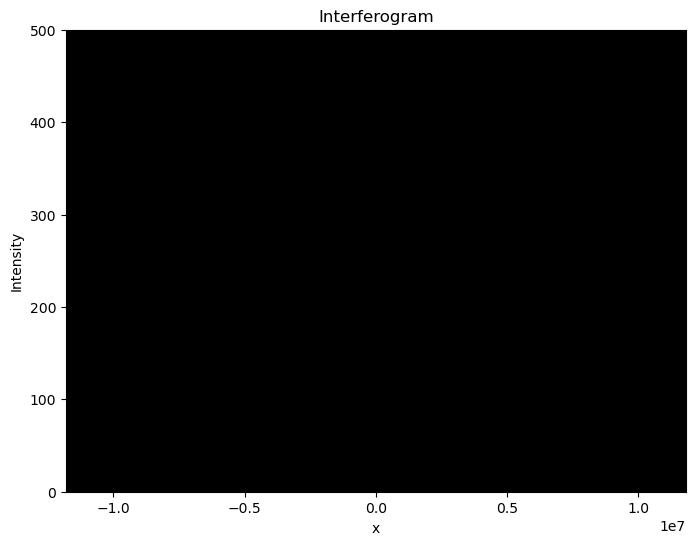

In [26]:
Er = np.array([[1], [1]])
Es = np.array([[1], [-1]])

info, i = pi.I(Er, Es, plot = True)